## TRABALHO PRÁTICO 1

Acumular as leituras por dias e depois agrupar por trimestre.


1 - Coletas realizadas separadas por trimestre:

Trimestre	Volume acumulado
31-03-2011	 	233.6
30-06-2011	 	216.4
30-09-2011	 	82.6
31-12-2011	 	191.4
31-03-2012	 	238.0
30-06-2012	 	155.4
30-09-2012	 	179.8
31-12-2012	 	438.6
31-03-2013	 	332.2
30-06-2013	 	264.8
30-09-2013	 	280.8
31-12-2013	 	332.4
31-03-2014	 	289.4
30-06-2014	 	351.8
30-09-2014	 	264.6
31-12-2014	 	399.6
31-03-2015	 	258.2
30-06-2015	 	260.8
30-09-2015	 	317.2
31-12-2015	 	580.8
31-03-2016	 	313.4
30-06-2016	 	167.6
30-09-2016	 	193.2
31-12-2016	 	466.8
31-03-2017	 	404.8
30-06-2017	 	371.0
30-09-2017	 	285.0
31-12-2017	 	274.2
31-03-2018	 	290.8
30-06-2018	 	132.4
30-09-2018	 	293.4
31-12-2018	 	355.2
31-03-2019	 	271.0
30-06-2019	 	259.4
30-09-2019	 	194.8
31-12-2019	 	405.0
31-03-2020	 	227.0
30-06-2020	 	201.2
30-09-2020	 	157.8
31-12-2020	 	30.8

2 - Gráficos do período :



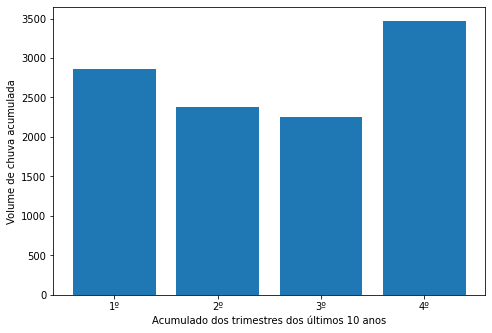


3 - Relatório sobre índice de coletas realizadas e previstas no trimestre:

Trimestre	Coletas realizadas	Coletas previstas	Índice de coletas
31-03-2011	 	1265	 	2160	 	58.56	%
30-06-2011	 	1305	 	2184	 	59.75	%
30-09-2011	 	1331	 	2208	 	60.28	%
31-12-2011	 	1342	 	2208	 	60.78	%
31-03-2012	 	1332	 	2184	 	60.99	%
30-06-2012	 	1298	 	2184	 	59.43	%
30-09-2012	 	1339	 	2208	 	60.64	%
31-12-2012	 	1377	 	2208	 	62.36	%
31-03-2013	 	1276	 	2160	 	59.07	%
30-06-2013	 	1318	 	2184	 	60.35	%
30-09-2013	 	1315	 	2208	 	59.56	%
31-12-2013	 	1324	 	2208	 	59.96	%
31-03-2014	 	1268	 	2160	 	58.7	%
30-06-2014	 	1333	 	2184	 	61.03	%
30-09-2014	 	1328	 	2208	 	60.14	%
31-12-2014	 	1369	 	2208	 	62.0	%
31-03-2015	 	1300	 	2160	 	60.19	%
30-06-2015	 	1356	 	2184	 	62.09	%
30-09-2015	 	1365	 	2208	 	61.82	%
31-12-2015	 	1325	 	2208	 	60.01	%
31-03-2016	 	1287	 	2184	 	58.93	%
30-06-2016	 	1337	 	2184	 	61.22	%
30-09-2016	 	1316	 	2208	 	59.6	%
31-12-2016	 	1311	 	2208	 	59.38	%
31-03-2017	 	1303	 	2

In [40]:

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

caminho = './'
dataset_orig = 'dataset_reg_chuva_santa_maria_2011_2020_2.csv'

# caminho para o dataset original
dataset_original_coletas = pd.read_csv(caminho + dataset_orig, sep = ';')

# substitui os valores null na coluna CHUVA pelo valor 0
dataset_original_coletas['CHUVA'].fillna(0.0, inplace = True)

# dataset original
dataset_original_coletas.sort_values(by = ['DT_MEDICAO', 'HR_MEDICAO'], inplace = True)
# reseta indice depois de ordenar linhas
dataset_original_coletas.reset_index(drop = True, inplace = True)

# pegando primeira e última data do dataset
todas_datas = dataset_original_coletas['DT_MEDICAO']
data_inicial = todas_datas[0]
data_final = todas_datas[len(dataset_original_coletas) - 1]

# convertendo primeira e última data para formato datetime
data_inicial_date = datetime.strptime(data_inicial, '%Y-%m-%d')
data_final_date = datetime.strptime(data_final, '%Y-%m-%d')

# vetor de datas com o período compreendido
dif_data_final_data_inicial = data_final_date - data_inicial_date
datas_periodo = pd.date_range(data_inicial_date, periods = (dif_data_final_data_inicial.days + 1))

# criando dataframe com as datas do período 
leituras = np.zeros(len(datas_periodo), dtype=int)
# criando estrutura dicionario com conjunto de dias e leituras
dt_periodo_previsto_coletas_dias = pd.DataFrame({'DT_MEDICAO' : datas_periodo, 'CHUVA' : leituras})



for linha, coluna in dataset_original_coletas.iterrows():
    dataset_original_coletas.at[linha, 'DT_MEDICAO'] = pd.Timestamp(coluna['DT_MEDICAO'])
    # substitui a virgula como divisor de float pelo ponto
    dataset_original_coletas.at[linha, 'CHUVA'] = float(str(coluna['CHUVA']).replace(',', '.'))


# agrupa o dataset por trimestre e soma os valores na coluna CHUVA
dataset_original_coletas_sum_leituras_trimestre = dataset_original_coletas.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].sum()
 
 

# 1 - Uma tabela com uma coluna contendo todos os trimestres de 2010-2020, a precipitação acumulada no respectivo trimestre;

dataset_original_coletas_trimestre = dataset_original_coletas.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].agg(['count' , 'sum'])
print("\n1 - Coletas realizadas separadas por trimestre:\n")

print("Trimestre", "Volume acumulado", sep = '\t')

for linha, coluna in dataset_original_coletas_trimestre.iterrows(): 
    print(linha.strftime("%d-%m-%Y"), " ",  round(coluna['sum'], 2), sep = '\t')
 


#  2. Um gráfico com a evolução da precipitação que contenha todo o trimestre

print("\n2 - Gráficos do período :\n")


a=b=c=d = 0;

for linha, coluna in dataset_original_coletas_trimestre.iterrows(): 
    trimestre = int(linha.strftime("%m")) / 3
    volume = coluna['sum']
    if trimestre <= 1 :
        a += volume
    elif trimestre <= 2 :
        b += volume
    elif trimestre <= 3 :
        c += volume
    else :
        d += volume
        

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

trimestres = ['1º', '2º', '3º', '4º']
leituras = [a, b, c, d]
ax.bar(trimestres, leituras)
plt.xlabel("Acumulado dos trimestres dos últimos 10 anos")
plt.ylabel("Volume de chuva acumulada")
plt.show()

# 3 - As observações sobre o número de medidas perdidas (dados faltantes) nos trimestres de 2010-2020.

for linha, coluna in dt_periodo_previsto_coletas_dias.iterrows(): 
    dt_periodo_previsto_coletas_dias.at[linha, 'DT_MEDICAO'] = pd.Timestamp(coluna['DT_MEDICAO'])
    dt_periodo_previsto_coletas_dias.at[linha, 'CHUVA']  =  1
  
dt_previsto_coletas_trimestre = dt_periodo_previsto_coletas_dias.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].agg(['count']) 


print("\n3 - Relatório sobre índice de coletas realizadas e previstas no trimestre:\n")
print("Trimestre", "Coletas realizadas", "Coletas previstas", "Índice de coletas", sep = '\t')
for linha, coluna in dataset_original_coletas_trimestre.iterrows():
    horas_trimestre = dt_previsto_coletas_trimestre.at[linha, 'count'] * 24
    percentual = (coluna['count'] / horas_trimestre) * 100
    print(linha.strftime("%d-%m-%Y"), " ", coluna['count'], " ", horas_trimestre, " ", round(percentual, 2),"%", sep = '\t')
 
 


